In [91]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # to print multiple outputs from the same cell
import math
import utils
import pandas as pd
from datetime import datetime, timedelta, date

### Let's load the merged dataframe

In [92]:
merged_df = pd.read_csv('dataset/merged_dataset_cleaned.csv', lineterminator='\n')
merged_df

,user_id,name,lang,bot,account_created,statuses_count,tweet_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created,text
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,486718663223828480,0,0,0,0,0,1,2019-07-11 03:49:06,"@4fri2endly0 ""A business that makes nothing bu..."
1,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,479535357126393856,0,0,0,0,0,0,2019-06-21 08:05:13,"""Happiness is not a station you arrive at, but..."
2,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,451700895491706880,0,0,0,0,0,0,2019-04-05 12:41:00,Music flow.
3,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,491920040405397504,0,0,0,0,0,1,2019-07-25 12:17:31,@_SimplyKC follow meeee...
4,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,460522543628046336,0,0,0,0,0,0,2019-04-29 20:55:05,"""You are the only person on earth who can use ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460632,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,591409992605028352,1,0,0,0,0,1,2020-04-25 01:15:04,RT @_MarcussA: Phone dry
10460633,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,570728918614974464,0,0,0,0,0,0,2020-02-27 23:35:52,@_Freak_x1
10460634,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,582259121648320512,1,0,0,0,0,0,2020-03-30 19:12:47,Something wrong
10460635,933183398,Corvanna,en,0,2017-11-09 23:24:16,5279,591238256626380800,0,0,0,0,0,0,2020-04-24 13:52:39,always going over my data


### Filter tweets only of 2019

In [93]:
# Cast tweet creation to datetime
merged_df["tweet_created"] = pd.to_datetime(merged_df["tweet_created"], errors="coerce")

year = 2019

merged_df = merged_df[merged_df.tweet_created.dt.year == year]
merged_df

,user_id,name,lang,bot,account_created,statuses_count,tweet_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,tweet_created,text
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,486718663223828480,0,0,0,0,0,1,2019-07-11 03:49:06,"@4fri2endly0 ""A business that makes nothing bu..."
1,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,479535357126393856,0,0,0,0,0,0,2019-06-21 08:05:13,"""Happiness is not a station you arrive at, but..."
2,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,451700895491706880,0,0,0,0,0,0,2019-04-05 12:41:00,Music flow.
3,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,491920040405397504,0,0,0,0,0,1,2019-07-25 12:17:31,@_SimplyKC follow meeee...
4,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,460522543628046336,0,0,0,0,0,0,2019-04-29 20:55:05,"""You are the only person on earth who can use ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457175,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,460078189067239360,0,0,0,0,0,0,2019-04-28 15:29:22,make up money could be going to so many other ...
10457176,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,461515583813476416,1,0,1,0,0,1,2019-05-02 14:41:04,@dilligaf_life !
10457177,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,982032609,0,0,0,0,0,0,2019-07-12 21:47:31,"@LottoRackz478 ""What we have learned from othe..."
10457178,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42,459627644548440064,0,0,0,0,0,0,2019-04-27 09:39:04,I Thank God Everyday. I Know Where I Could've ...


As we can see there are ~= 5000000 tweets made in 2019 in the dataset

### Group by user, tweet creation in the same day and collapse the values (sum)

In [94]:
temp_df = merged_df.groupby(['user_id',merged_df['tweet_created'].dt.to_period('D')], as_index=False).sum(['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions'])
temp_df = temp_df[['user_id', 'bot', 'retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']]
temp_df['AcceptanceScore'] = temp_df['retweet_count'] + temp_df['reply_count'] + temp_df['favorite_count']
temp_df['DiffusionScore'] = temp_df['num_hashtags'] + temp_df['num_urls'] + temp_df['num_mentions']
temp_df['SuccessScore'] = temp_df['AcceptanceScore']/ (temp_df['DiffusionScore'] + 0.1)
temp_df['bot'].mask(temp_df['bot']>0, 1, inplace=True)
temp_df = temp_df[['user_id', 'bot', 'SuccessScore']]


temp_tmp = merged_df.groupby(['user_id',merged_df['tweet_created'].dt.to_period('D')], as_index=False).size()
temp_df['tweet_created'] = temp_tmp['tweet_created'].astype(str)
temp_df['tweet_created'] = pd.to_datetime(temp_df['tweet_created'], errors='coerce')
final_df = temp_df
final_df

,user_id,bot,SuccessScore,tweet_created
0,722623,0,1.549296,2019-01-03
1,722623,0,1626.393443,2019-01-04
2,722623,0,1.818182,2019-01-05
3,722623,0,0.322581,2019-01-06
4,722623,0,11.526718,2019-01-07
...,...,...,...,...
512275,2722021425,0,4.545455,2019-07-28
512276,2722021425,0,3.636364,2019-07-29
512277,2722021425,0,1.463415,2019-07-30
512278,2722021425,0,2683.636364,2019-07-31


### Create a list of DataFrames. This represents the timeseries for each user. Add the missing days to each user

In [95]:
users = temp_df.groupby('user_id', as_index=False)['bot'].sum()
users['bot'].mask(users['bot']>0, 1, inplace=True)
from tslearn.preprocessing import TimeSeriesResampler
scaler = TimeSeriesResampler(sz=80)  
USERS_TIMESSERIES_LIST = {}
start_date = date(2019, 1, 1)
end_date = date(2019, 12, 1)

for user in users.user_id:

    USERS_TIMESSERIES_LIST[user] = final_df[final_df.user_id == user][['SuccessScore', 'tweet_created']]
    
    new_date_range = pd.date_range(start="2019-01-01", end="2019-12-31", freq="D")
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].set_index('tweet_created')
    # USERS_TIMESSERIES_LIST[user] = pd.Series(USERS_TIMESSERIES_LIST[user].squeeze())
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].reindex(new_date_range, fill_value=-1)
    USERS_TIMESSERIES_LIST[user].index.name = 'day'
    USERS_TIMESSERIES_LIST[user].reset_index(inplace=True)
    USERS_TIMESSERIES_LIST[user].drop(columns='day', inplace=True)
    USERS_TIMESSERIES_LIST[user] = USERS_TIMESSERIES_LIST[user].SuccessScore
    USERS_TIMESSERIES_LIST[user] = ((USERS_TIMESSERIES_LIST[user] - USERS_TIMESSERIES_LIST[user].mean())/USERS_TIMESSERIES_LIST[user].std()).array
    # USERS_TIMESSERIES_LIST[user] = scaler.fit_transform(USERS_TIMESSERIES_LIST[user].values.reshape(1, -1)).flatten()


In [96]:
import numpy as np
df = pd.DataFrame()
df['user_id'] = list(USERS_TIMESSERIES_LIST.keys())
df['dim_0'] = np.array(USERS_TIMESSERIES_LIST.values())
df = pd.merge(df, users, on = 'user_id')
df = df.drop(columns='user_id')
df

,dim_0,bot
0,"[-0.05620496103712694, -0.05620496103712694, -...",0
1,"[-0.1546064351743364, -0.1546064351743364, -0....",0
2,"[-0.14648949717796833, -0.14648949717796833, -...",0
3,"[-0.14485360704500158, -0.14485360704500158, 3...",0
4,"[-0.11760158500156577, -0.11760158500156577, 0...",0
...,...,...
6575,"[-0.09060272696309186, -0.09060272696309186, -...",0
6576,"[-0.09090977893411796, -0.09090977893411796, -...",0
6577,"[-0.10534841492900962, -0.10534841492900962, -...",0
6578,"[-0.06138575223755642, -0.06138575223755642, -...",0


### Try classifying


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
my_df = df.copy()

y = my_df.pop('bot')
X = np.stack(my_df.dim_0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [101]:
import keras_tuner
import tensorflow as tf

class my_HyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        for i in range(1, hp.Choice("num_layers", [5]) + 1):
            model.add(tf.keras.layers.Dense(
                hp.Choice(f"units_layer_{i}", [256]),
                activation='relu'))
       
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        
        model.compile(
            optimizer=tf.keras.optimizers.SGD(
                learning_rate = hp.Choice('learning_rate', [0.05]),
                momentum=0.0,
                nesterov=False,
                decay=hp.Choice('weight_decay', [5e-2]),
                clipnorm=None,
                clipvalue=None,
                global_clipnorm=None,
                # use_ema=False,
                # ema_momentum=0.99,
                # ema_overwrite_frequency=None,
                # jit_compile=True,
                name="SGD"
            ), 
            loss="binary_crossentropy", 
            metrics=["accuracy"]
            )
        return model


    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            **kwargs,
            shuffle=True,
            epochs=hp.Choice("epochs",  [150]),
            batch_size=hp.Choice("batch_size",  [512]),
            verbose=1,  
            workers=8,
            use_multiprocessing=True
            )
        

tuner = keras_tuner.RandomSearch(
    hypermodel=my_HyperModel(),
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1,
    overwrite=True,
    directory="./models/ts/keras_tuner",
    project_name="nn_classification",
)


tuner.search(X_train , y_train, validation_data=(X_test, y_test))
model = tuner.get_best_models()[0]

Trial 2 Complete [00h 00m 11s]
val_accuracy: 0.8064842820167542

Best val_accuracy So Far: 0.8064842820167542
Total elapsed time: 00h 00m 23s
INFO:tensorflow:Oracle triggered exit


In [102]:
from sklearn.metrics import classification_report
predicted_labels = (model.predict(X_test) > 0.5).astype("bool")
print(classification_report(y_test, 
                            predicted_labels, 
                            target_names=['Not Bot', 'Bot']))

62/62 [==============================] - 0s 926us/step
              precision    recall  f1-score   support

     Not Bot       0.80      0.70      0.75       811
         Bot       0.81      0.88      0.84      1163

    accuracy                           0.81      1974
   macro avg       0.81      0.79      0.80      1974
weighted avg       0.81      0.81      0.80      1974



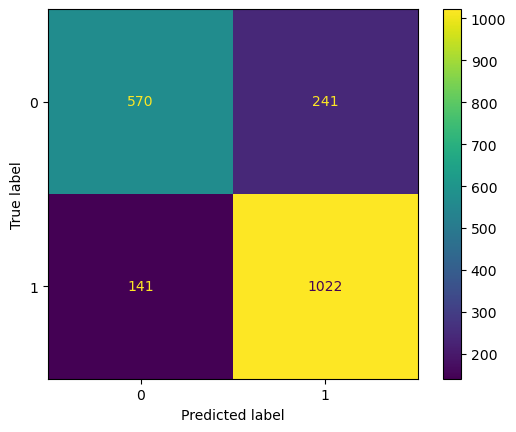

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(cm)
disp.plot()